In [2]:
#!pip install apyori

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import utils
%matplotlib inline

In [4]:
#ASSOCIATION RULE MINING USING APRIORI ALGORITHMS
#importing and reading dataset
diagnosis = pd.read_csv('Acute_Inflammations.csv')

In [5]:
#checking rows and columns
#column patient's temperature was dropped during preprocessing on excel sheet
diagnosis.head()

,Nausea,Lumbar_Pain,Urine_Pushing,Micturition_Pains,Urethra_Burning,Inflammation_Of_UB,Nephritis_Of_RPO
0,no,yes,no,no,no,no,no
1,no,no,yes,yes,yes,yes,no
2,no,yes,no,no,no,no,no
3,no,no,yes,yes,yes,yes,no
4,no,yes,no,no,no,no,no


In [6]:
#dataset analysis
diagnosis.tail()

,Nausea,Lumbar_Pain,Urine_Pushing,Micturition_Pains,Urethra_Burning,Inflammation_Of_UB,Nephritis_Of_RPO
115,no,yes,yes,no,yes,no,yes
116,no,no,no,no,no,no,no
117,yes,yes,no,yes,no,no,yes
118,no,yes,yes,no,yes,no,yes
119,no,yes,yes,no,yes,no,yes


In [7]:
#dataset description
diagnosis.describe()

,Nausea,Lumbar_Pain,Urine_Pushing,Micturition_Pains,Urethra_Burning,Inflammation_Of_UB,Nephritis_Of_RPO
count,120,120,120,120,120,120,120
unique,2,2,2,2,2,2,2
top,no,yes,yes,no,no,no,no
freq,91,70,80,61,70,61,70


In [8]:
diagnosis.shape

(120, 7)

In [9]:
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nausea              120 non-null    object
 1   Lumbar_Pain         120 non-null    object
 2   Urine_Pushing       120 non-null    object
 3   Micturition_Pains   120 non-null    object
 4   Urethra_Burning     120 non-null    object
 5   Inflammation_Of_UB  120 non-null    object
 6   Nephritis_Of_RPO    120 non-null    object
dtypes: object(7)
memory usage: 6.7+ KB


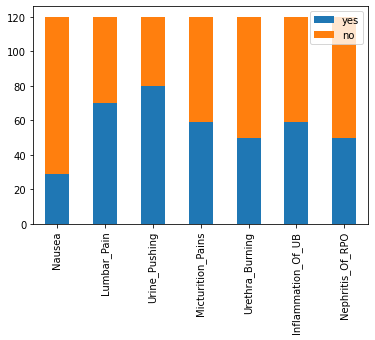

In [10]:
#stacked plotting and exploration of the various observations
yes = (diagnosis=='yes').sum()
no = (diagnosis=='no').sum()
diagnosed = pd.concat([yes,no],axis=1,keys=['yes','no'])
ax=diagnosed.plot.bar(stacked=True)
plt.show()

In [11]:
#main dataset preprocessing
patients=utils.data_prepare(diagnosis)

In [12]:
#reading the patients utils package
patients

[['Lumbar_Pain'],
 ['Urine_Pushing',
  'Micturition_Pains',
  'Urethra_Burning',
  'Inflammation_Of_UB'],
 ['Lumbar_Pain'],
 ['Urine_Pushing',
  'Micturition_Pains',
  'Urethra_Burning',
  'Inflammation_Of_UB'],
 ['Lumbar_Pain'],
 ['Lumbar_Pain'],
 ['Urine_Pushing',
  'Micturition_Pains',
  'Urethra_Burning',
  'Inflammation_Of_UB'],
 ['Lumbar_Pain'],
 ['Urine_Pushing',
  'Micturition_Pains',
  'Urethra_Burning',
  'Inflammation_Of_UB'],
 ['Urine_Pushing',
  'Micturition_Pains',
  'Urethra_Burning',
  'Inflammation_Of_UB'],
 ['Urine_Pushing',
  'Micturition_Pains',
  'Urethra_Burning',
  'Inflammation_Of_UB'],
 ['Lumbar_Pain'],
 ['Lumbar_Pain'],
 ['Urine_Pushing',
  'Micturition_Pains',
  'Urethra_Burning',
  'Inflammation_Of_UB'],
 ['Lumbar_Pain'],
 ['Lumbar_Pain'],
 ['Urine_Pushing',
  'Micturition_Pains',
  'Urethra_Burning',
  'Inflammation_Of_UB'],
 ['Urine_Pushing',
  'Micturition_Pains',
  'Urethra_Burning',
  'Inflammation_Of_UB'],
 ['Urine_Pushing',
  'Micturition_Pains',
  'U

In [13]:
#creating association rule on main dataset
Rules = list(apriori(patients, min_support=0.20,min_confidence=0.50))
associationRules = utils.extract(Rules)
rules_df=pd.DataFrame(associationRules,columns=['LHS','RHS','Support','Confidence','Lift'])
len(rules_df)


115

In [14]:
rules_df.shape

(115, 5)

In [15]:
#checking rules with highest Lift

rules_df.nlargest(10,"Lift")

,LHS,RHS,Support,Confidence,Lift
39,[Nausea],"[Lumbar_Pain, Micturition_Pains]",0.241667,1.0,4.137931
40,"[Lumbar_Pain, Micturition_Pains]",[Nausea],0.241667,1.0,4.137931
67,[Nausea],"[Nephritis_Of_RPO, Micturition_Pains]",0.241667,1.0,4.137931
70,"[Nephritis_Of_RPO, Micturition_Pains]",[Nausea],0.241667,1.0,4.137931
91,[Nausea],"[Lumbar_Pain, Micturition_Pains, Nephritis_Of_...",0.241667,1.0,4.137931
93,"[Lumbar_Pain, Micturition_Pains]","[Nausea, Nephritis_Of_RPO]",0.241667,1.0,4.137931
94,"[Lumbar_Pain, Nausea]","[Nephritis_Of_RPO, Micturition_Pains]",0.241667,1.0,4.137931
97,"[Nephritis_Of_RPO, Micturition_Pains]","[Lumbar_Pain, Nausea]",0.241667,1.0,4.137931
98,"[Nausea, Nephritis_Of_RPO]","[Lumbar_Pain, Micturition_Pains]",0.241667,1.0,4.137931
100,"[Lumbar_Pain, Micturition_Pains, Nephritis_Of_...",[Nausea],0.241667,1.0,4.137931


In [16]:
#checking rules with highest Support
#Top rules has empty item sets on the LHS from the observationn below
rules_df.nlargest(10,"Support")

,LHS,RHS,Support,Confidence,Lift
1,[],[Urine_Pushing],0.666667,0.666667,1.000000
0,[],[Lumbar_Pain],0.583333,0.583333,1.000000
5,[Inflammation_Of_UB],[Urine_Pushing],0.491667,1.000000,1.500000
6,[Urine_Pushing],[Inflammation_Of_UB],0.491667,0.737500,1.500000
8,[Lumbar_Pain],[Nephritis_Of_RPO],0.416667,0.714286,1.714286
9,[Nephritis_Of_RPO],[Lumbar_Pain],0.416667,1.000000,1.714286
24,[Urethra_Burning],[Urine_Pushing],0.416667,1.000000,1.500000
25,[Urine_Pushing],[Urethra_Burning],0.416667,0.625000,1.500000
2,[Inflammation_Of_UB],[Micturition_Pains],0.408333,0.830508,1.689170
3,[Micturition_Pains],[Inflammation_Of_UB],0.408333,0.830508,1.689170


In [17]:
#checking rules with highest Confidence
rules_df.nlargest(10,"Confidence")

,LHS,RHS,Support,Confidence,Lift
5,[Inflammation_Of_UB],[Urine_Pushing],0.491667,1.0,1.500000
7,[Nausea],[Lumbar_Pain],0.241667,1.0,1.714286
9,[Nephritis_Of_RPO],[Lumbar_Pain],0.416667,1.0,1.714286
13,[Nausea],[Micturition_Pains],0.241667,1.0,2.033898
18,[Nausea],[Nephritis_Of_RPO],0.241667,1.0,2.400000
24,[Urethra_Burning],[Urine_Pushing],0.416667,1.0,1.500000
28,"[Inflammation_Of_UB, Urethra_Burning]",[Micturition_Pains],0.241667,1.0,2.033898
29,"[Urethra_Burning, Micturition_Pains]",[Inflammation_Of_UB],0.241667,1.0,2.033898
33,"[Inflammation_Of_UB, Micturition_Pains]",[Urine_Pushing],0.408333,1.0,1.500000
35,"[Urine_Pushing, Micturition_Pains]",[Inflammation_Of_UB],0.408333,1.0,2.033898


In [18]:
#using a lambda function to filter out those rules which have an empty list in the LHS column of the Data Frame
rules_df[rules_df['LHS'].apply(lambda x: len(x) > 0)].nlargest(10,"Support")

,LHS,RHS,Support,Confidence,Lift
5,[Inflammation_Of_UB],[Urine_Pushing],0.491667,1.000000,1.500000
6,[Urine_Pushing],[Inflammation_Of_UB],0.491667,0.737500,1.500000
8,[Lumbar_Pain],[Nephritis_Of_RPO],0.416667,0.714286,1.714286
9,[Nephritis_Of_RPO],[Lumbar_Pain],0.416667,1.000000,1.714286
24,[Urethra_Burning],[Urine_Pushing],0.416667,1.000000,1.500000
25,[Urine_Pushing],[Urethra_Burning],0.416667,0.625000,1.500000
2,[Inflammation_Of_UB],[Micturition_Pains],0.408333,0.830508,1.689170
3,[Micturition_Pains],[Inflammation_Of_UB],0.408333,0.830508,1.689170
16,[Micturition_Pains],[Urine_Pushing],0.408333,0.830508,1.245763
17,[Urine_Pushing],[Micturition_Pains],0.408333,0.612500,1.245763


In [19]:
#Reducing number of rules by decreasing the number of maximum itemset, setting length at 3
#then run the rule again, creating an association rule on the main dataset
Rules = list(apriori(patients, min_support=0.30,min_confidence=0.50,max_length=3))
associationRules = utils.extract(Rules)
rules_df=pd.DataFrame(associationRules,columns=['LHS','RHS','Support','Confidence','Lift'])
len(rules_df)

28

In [20]:
#having a modified rule that can be used, we can now explore the rules with highest lift support and confidence
rules_df.nlargest(10,"Lift")

,LHS,RHS,Support,Confidence,Lift
23,[Nephritis_Of_RPO],"[Lumbar_Pain, Urine_Pushing]",0.333333,0.800000,2.400000
26,"[Lumbar_Pain, Urine_Pushing]",[Nephritis_Of_RPO],0.333333,1.000000,2.400000
16,[Inflammation_Of_UB],"[Urine_Pushing, Micturition_Pains]",0.408333,0.830508,2.033898
21,"[Urine_Pushing, Micturition_Pains]",[Inflammation_Of_UB],0.408333,1.000000,2.033898
6,[Lumbar_Pain],[Nephritis_Of_RPO],0.416667,0.714286,1.714286
7,[Nephritis_Of_RPO],[Lumbar_Pain],0.416667,1.000000,1.714286
22,[Lumbar_Pain],"[Nephritis_Of_RPO, Urine_Pushing]",0.333333,0.571429,1.714286
27,"[Nephritis_Of_RPO, Urine_Pushing]",[Lumbar_Pain],0.333333,1.000000,1.714286
2,[Inflammation_Of_UB],[Micturition_Pains],0.408333,0.830508,1.689170
3,[Micturition_Pains],[Inflammation_Of_UB],0.408333,0.830508,1.689170


In [21]:
rules_df.nlargest(10,"Support")

,LHS,RHS,Support,Confidence,Lift
1,[],[Urine_Pushing],0.666667,0.666667,1.000000
0,[],[Lumbar_Pain],0.583333,0.583333,1.000000
4,[Inflammation_Of_UB],[Urine_Pushing],0.491667,1.000000,1.500000
5,[Urine_Pushing],[Inflammation_Of_UB],0.491667,0.737500,1.500000
6,[Lumbar_Pain],[Nephritis_Of_RPO],0.416667,0.714286,1.714286
7,[Nephritis_Of_RPO],[Lumbar_Pain],0.416667,1.000000,1.714286
14,[Urethra_Burning],[Urine_Pushing],0.416667,1.000000,1.500000
15,[Urine_Pushing],[Urethra_Burning],0.416667,0.625000,1.500000
2,[Inflammation_Of_UB],[Micturition_Pains],0.408333,0.830508,1.689170
3,[Micturition_Pains],[Inflammation_Of_UB],0.408333,0.830508,1.689170


In [22]:
rules_df.nlargest(10,"Confidence")

,LHS,RHS,Support,Confidence,Lift
4,[Inflammation_Of_UB],[Urine_Pushing],0.491667,1.000000,1.500000
7,[Nephritis_Of_RPO],[Lumbar_Pain],0.416667,1.000000,1.714286
14,[Urethra_Burning],[Urine_Pushing],0.416667,1.000000,1.500000
19,"[Inflammation_Of_UB, Micturition_Pains]",[Urine_Pushing],0.408333,1.000000,1.500000
21,"[Urine_Pushing, Micturition_Pains]",[Inflammation_Of_UB],0.408333,1.000000,2.033898
26,"[Lumbar_Pain, Urine_Pushing]",[Nephritis_Of_RPO],0.333333,1.000000,2.400000
27,"[Nephritis_Of_RPO, Urine_Pushing]",[Lumbar_Pain],0.333333,1.000000,1.714286
2,[Inflammation_Of_UB],[Micturition_Pains],0.408333,0.830508,1.689170
3,[Micturition_Pains],[Inflammation_Of_UB],0.408333,0.830508,1.689170
10,[Micturition_Pains],[Urine_Pushing],0.408333,0.830508,1.245763


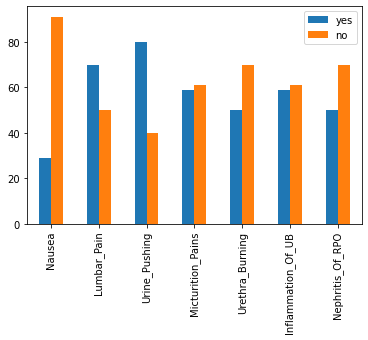

In [23]:
#indepth investigation of the dataset using barchart
ax=diagnosed.plot.bar()
plt.show()

In [28]:
#In this plot Urine_Pushing is the most common diagnosis. Here there is need to see the rules where patients are diagnosed of such ailment, 
#Getting the rules for Urine_Pushing, code below was used: with an increased minimun confidence @50% to yield more rules, the lower the better
Rules = list(apriori(patients, min_support=0.40,min_confidence=0.50))
associationRules = utils.extract(Rules, 'Urine_Pushing',2)
utils.inspect(associationRules)

The number of associated rules: 6
LHS: ['Inflammation_Of_UB'] --> RHS:['Urine_Pushing'], support: 0.49, confidence: 1.00, lift: 1.50
--------------------------------------------------------------------------------
LHS: ['Micturition_Pains'] --> RHS:['Urine_Pushing'], support: 0.41, confidence: 0.83, lift: 1.25
--------------------------------------------------------------------------------
LHS: ['Urethra_Burning'] --> RHS:['Urine_Pushing'], support: 0.42, confidence: 1.00, lift: 1.50
--------------------------------------------------------------------------------
LHS: ['Inflammation_Of_UB'] --> RHS:['Urine_Pushing', 'Micturition_Pains'], support: 0.41, confidence: 0.83, lift: 2.03
--------------------------------------------------------------------------------
LHS: ['Micturition_Pains'] --> RHS:['Inflammation_Of_UB', 'Urine_Pushing'], support: 0.41, confidence: 0.83, lift: 1.69
--------------------------------------------------------------------------------
LHS: ['Inflammation_Of_UB', 

In [25]:
#!pip install plotly==5.10.0
#Using plotly to visualzize result

In [29]:
#Rules plotting in an interactive pattern
rules_df=pd.DataFrame(associationRules,columns=['LHS','RHS','Support','Confidence','Lift'])
import plotly.express as px
fig = px.scatter(rules_df,x="Support",y="Confidence",color="Lift",
                 hover_data=['LHS','RHS'],color_continuous_scale="agsunset")
fig.show()

In [27]:
#number of true diagnosed Urine Pushing
diagnosis.iloc[:,2].value_counts()

yes    80
no     40
Name: Urine_Pushing, dtype: int64